In [20]:
# cái này loại bỏ mấy cái warning ko có tác dụng gì nhưng để cho đẹp
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
file_path = 'Sales Data.csv'
#parse_dates này sẽ biến đổi order date về theo format năm-tháng-ngày
df = pd.read_csv(file_path, parse_dates=['Order Date'])
df = df.replace('NULL', np.nan) #Thay những giá trị bị thiếu thành NaN
df.head()

,Unnamed: 0,Order ID,Product Category,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Time of Day
0,0,295665,Laptops and Computers,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Night
1,1,295666,Home Appliances,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Morning
2,2,295667,Charging Cables,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Evening
3,3,295668,Monitors,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Afternoon
4,4,295669,Charging Cables,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Afternoon


    Month       Sales
0       1  1822256.73
1       2  2202022.42
2       3  2807100.38
3       4  3390670.24
4       5  3152606.75
5       6  2577802.26
6       7  2647775.76
7       8  2244467.88
8       9  2097560.13
9      10  3736726.88
10     11  3199603.20
11     12  4613443.34


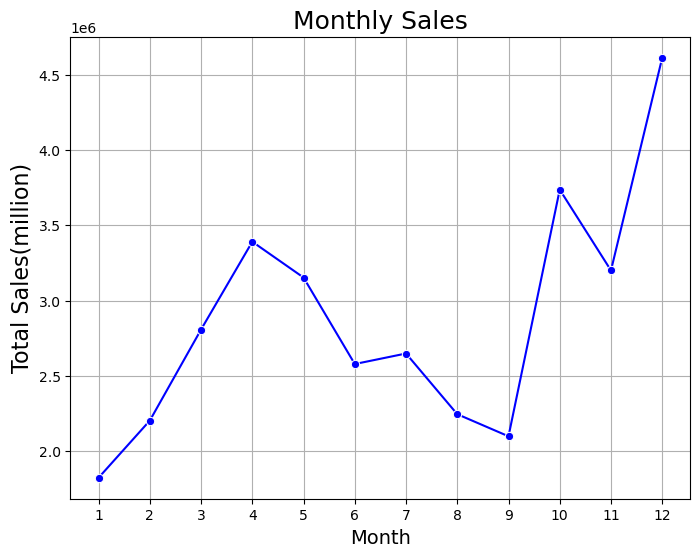

In [22]:
#Tính tổng sales của từng tháng
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index() 
print(monthly_sales)

#Vẽ biểu đồ theo tổng sales của từng tháng (biểu đồ đường)
plt.figure(figsize=(8, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o', color='blue')
plt.title('Monthly Sales', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales(million)', fontsize=16)
plt.xticks(range(1, 13))
plt.grid(True) #cái này để hiện mấy cái ô kẻ trên biểu đồ
plt.show()

<Figure size 1400x1000 with 0 Axes>

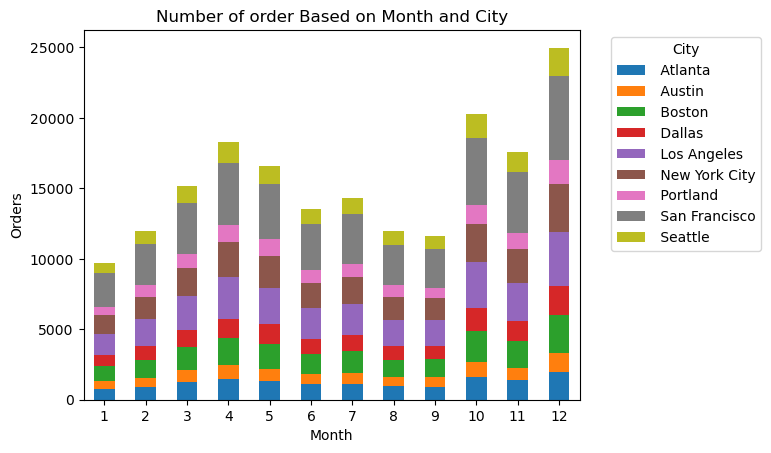

In [23]:
#Cái này sẽ cho thấy số lượng đơn đặt hàng của từng thành phố
month_city = df.groupby(['Month', 'City']).size().unstack()

plt.figure(figsize=(14, 10))
month_city.plot(kind='bar', stacked=True)
plt.title('Number of order Based on Month and City')
plt.xlabel('Month')
plt.ylabel('Orders')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

             City       Sales
0         Atlanta  2795498.58
1          Austin  1819581.75
2          Boston  3661642.01
3          Dallas  2767975.40
4     Los Angeles  5452570.80
5   New York City  4664317.43
6        Portland  2320490.61
7   San Francisco  8262203.91
8         Seattle  2747755.48


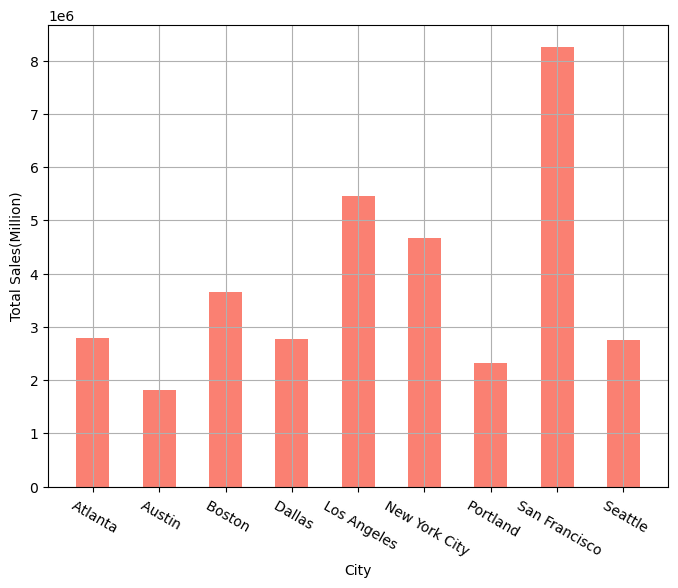

In [24]:
#Tính tổng doanh thu của từng thành phố
city_sales = df.groupby('City')['Sales'].sum().reset_index() 
print(city_sales)
,
#Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.bar(city_sales['City'], city_sales['Sales'], color='salmon', width=0.5)
plt.xlabel('City')
plt.ylabel('Total Sales(Million)')
plt.xticks(rotation=330)
plt.grid(True) 
plt.show()

         City  Month      Sales
0     Atlanta      1  149159.54
1     Atlanta      2  176470.30
2     Atlanta      3  231905.38
3     Atlanta      4  284448.91
4     Atlanta      5  238853.99
..        ...    ...        ...
103   Seattle      8  189715.09
104   Seattle      9  156369.27
105   Seattle     10  316856.26
106   Seattle     11  252080.13
107   Seattle     12  387317.93

[108 rows x 3 columns]


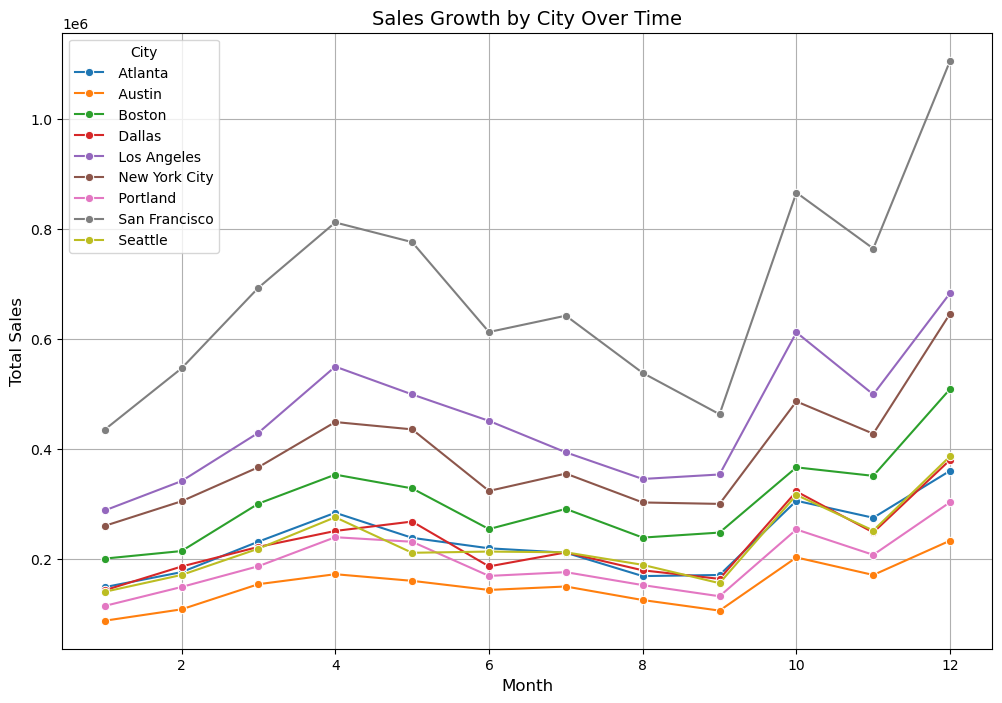

In [25]:
#Tỷ lệ tăng trưởng doanh thu theo tháng của từng thành phố 
city_monthly_sales = df.groupby(['City', 'Month'])['Sales'].sum().reset_index()
print(city_monthly_sales)
city_monthly_sales.columns = ['City', 'Month', 'Total Sales']
city_monthly_sales.to_csv('city_monthly_sales.csv', index=False) #Lưu kết quả dưới dang file csv, bấm vào home tìm file tên như kia để mở

plt.figure(figsize=(12, 8))
sns.lineplot(data=city_monthly_sales, x='Month', y='Total Sales', hue='City', marker='o')
plt.title('Sales Growth by City Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.legend(title='City')
plt.show()

In [26]:
#Cái này để tính xem mỗi loại trong Product Category là có cái gì và có bao nhiêu
PC = df['Product Category'].value_counts()
print(PC)

Product Category
Audio Devices             47756
Charging Cables           43561
Batterie                  41218
Monitors                  24019
Phones and Accessories    14432
Laptops and Computers      8852
Entertainment Devices      4800
Home Appliances            1312
Name: count, dtype: int64


         Product Category        Sales  Percentage
0           Audio Devices   3941193.86   11.426388
1                Batterie    198859.23    0.576537
2         Charging Cables    633595.40    1.836932
3   Entertainment Devices   1445700.00    4.191402
4         Home Appliances    787200.00    2.282266
5   Laptops and Computers  12167558.70   35.276429
6                Monitors   6377228.78   18.488989
7  Phones and Accessories   8940700.00   25.921056 0    11.426388
1     0.576537
2     1.836932
3     4.191402
4     2.282266
5    35.276429
6    18.488989
7    25.921056
Name: Percentage, dtype: float64


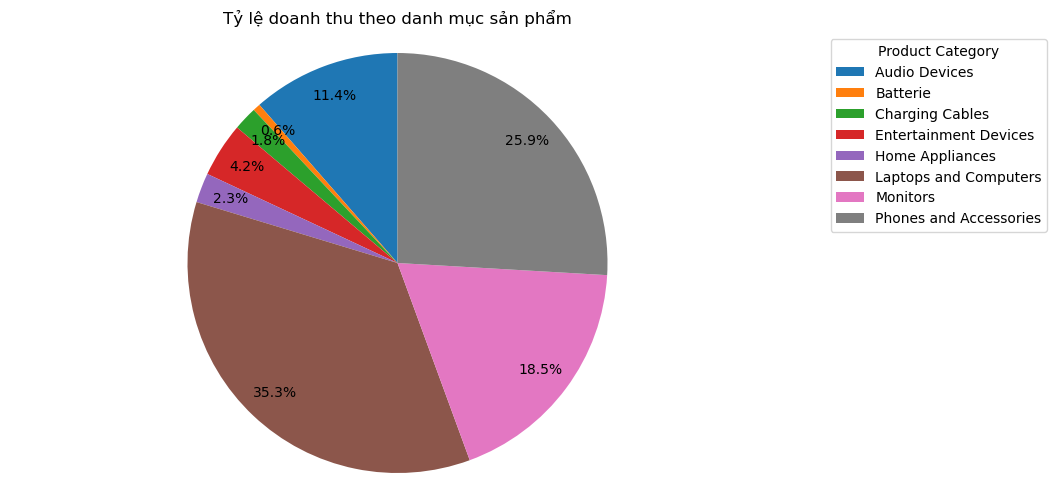

In [27]:
product_sales_by_category = df.groupby('Product Category')['Sales'].sum().reset_index()
total_sales = product_sales_by_category['Sales'].sum()
product_sales_by_category['Percentage'] = (product_sales_by_category['Sales'] / total_sales) * 100
print(product_sales_by_category,product_sales_by_category['Percentage'] )

plt.figure(figsize=(10, 6))
plt.pie(product_sales_by_category['Sales'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, labeldistance=1.1)
plt.title('Tỷ lệ doanh thu theo danh mục sản phẩm')
#Cái dòng lệnh dưới dùng để tạo chú thích, vị trí là ở phía bên trái chếch lên trên, còn bbox thì giúp cái chú thích này không bị đè vào biểu đồ
plt.legend(product_sales_by_category['Product Category'], title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis('equal')  
plt.show()

In [28]:
#Cái này thì đếm xem các sản phẩm trong cột Product có cái gì và số lượng được đặt mua là bao nhiêu và chúng thuộc loại nào ở Product Category
product_quantities_by_category = df.groupby(['Product Category', 'Product'])['Quantity Ordered'].sum().reset_index()
print(product_quantities_by_category)

          Product Category                     Product  Quantity Ordered
0            Audio Devices    Apple Airpods Headphones             15661
1            Audio Devices  Bose SoundSport Headphones             13457
2            Audio Devices            Wired Headphones             20557
3                 Batterie       AA Batteries (4-pack)             27635
4                 Batterie      AAA Batteries (4-pack)             31017
5          Charging Cables    Lightning Charging Cable             23217
6          Charging Cables        USB-C Charging Cable             23975
7    Entertainment Devices               Flatscreen TV              4819
8          Home Appliances                    LG Dryer               646
9          Home Appliances          LG Washing Machine               666
10   Laptops and Computers          Macbook Pro Laptop              4728
11   Laptops and Computers             ThinkPad Laptop              4130
12                Monitors                20in Moni

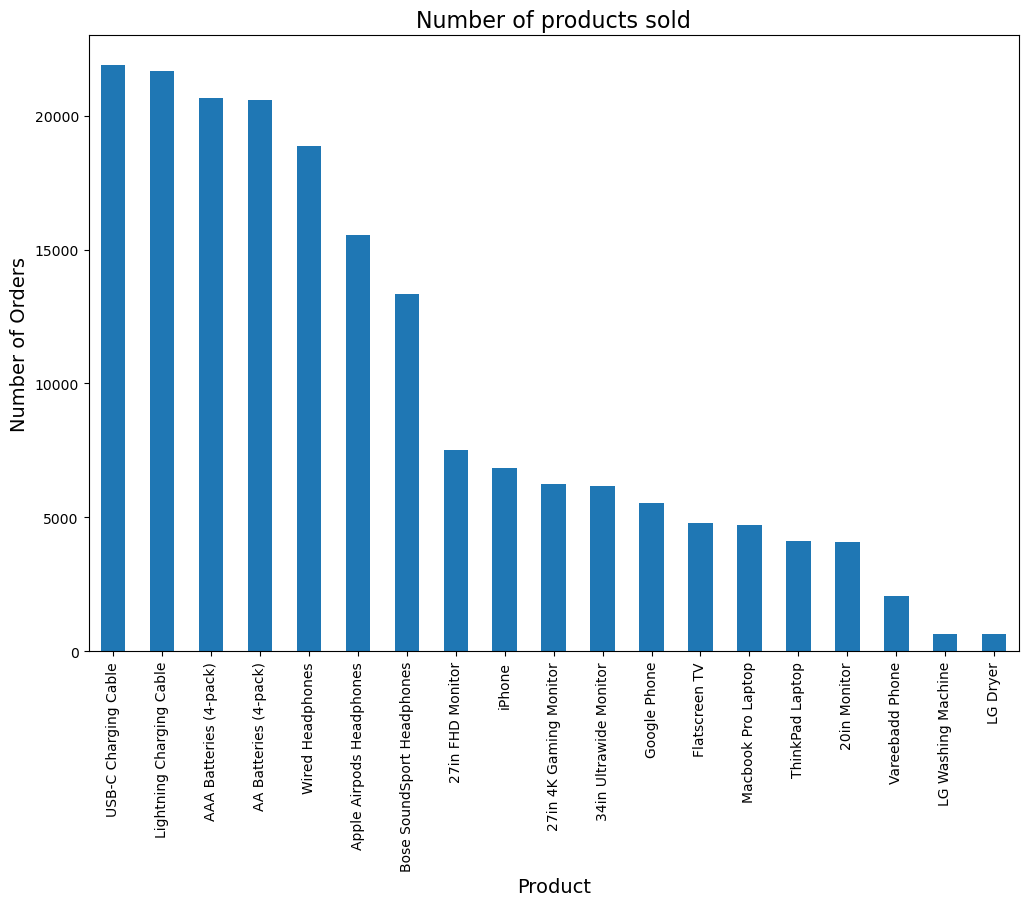

In [29]:
product_counts = df['Product'].value_counts()
plt.figure(figsize=(12, 8))
product_counts.plot(kind='bar')
plt.title('Number of products sold',fontsize=16)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Number of Orders',fontsize=14)
plt.xticks(rotation=90)
plt.show()

                       Product       Sales
0                 20in Monitor   454148.71
1       27in 4K Gaming Monitor  2435097.56
2             27in FHD Monitor  1132424.50
3       34in Ultrawide Monitor  2355558.01
4        AA Batteries (4-pack)   106118.40
5       AAA Batteries (4-pack)    92740.83
6     Apple Airpods Headphones  2349150.00
7   Bose SoundSport Headphones  1345565.43
8                Flatscreen TV  1445700.00
9                 Google Phone  3319200.00
10                    LG Dryer   387600.00
11          LG Washing Machine   399600.00
12    Lightning Charging Cable   347094.15
13          Macbook Pro Laptop  8037600.00
14             ThinkPad Laptop  4129958.70
15        USB-C Charging Cable   286501.25
16             Vareebadd Phone   827200.00
17            Wired Headphones   246478.43
18                      iPhone  4794300.00


<Figure size 1200x800 with 0 Axes>

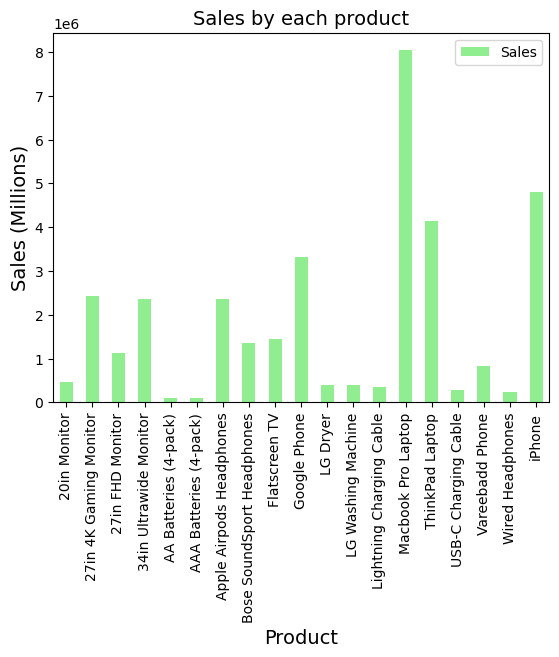

In [14]:
product_revenue = df.groupby('Product')['Sales'].sum().reset_index()
print(product_revenue)

plt.figure(figsize=(12, 8))
product_revenue.plot(kind='bar', x='Product', color = 'lightgreen')
plt.title('Sales by each product',fontsize=14)
plt.xlabel('Product',fontsize=14)
plt.ylabel('Sales (Millions)',fontsize=14)

plt.xticks(rotation=90)
plt.show()


Top 10 product pairs:
[(('Lightning Charging Cable', 'iPhone'), 1015), (('Google Phone', 'USB-C Charging Cable'), 999), (('Wired Headphones', 'iPhone'), 462), (('Google Phone', 'Wired Headphones'), 423), (('Apple Airpods Headphones', 'iPhone'), 373), (('USB-C Charging Cable', 'Vareebadd Phone'), 368), (('Bose SoundSport Headphones', 'Google Phone'), 228), (('USB-C Charging Cable', 'Wired Headphones'), 205), (('Vareebadd Phone', 'Wired Headphones'), 149), (('Lightning Charging Cable', 'Wired Headphones'), 129)]


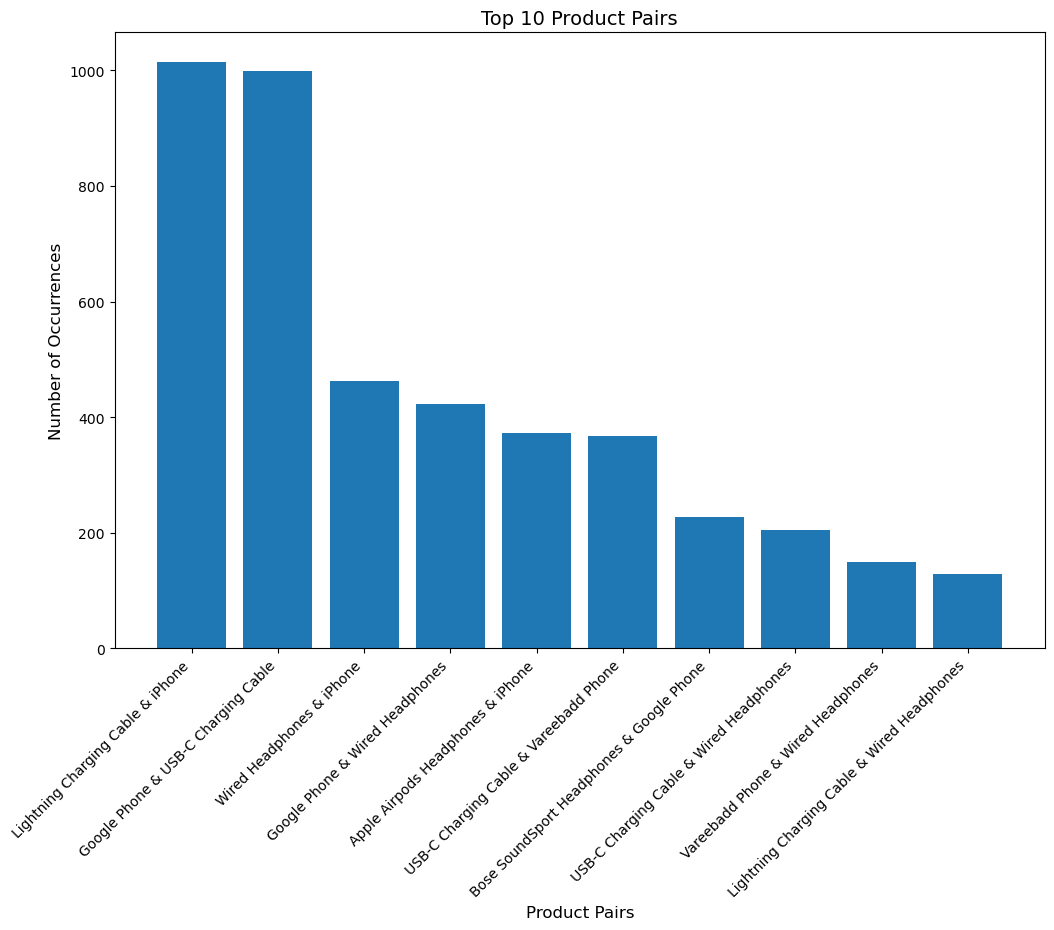

In [30]:
#Cái này nó hơi khác với bài của Sơn Vũ 
#Hai cái from bên dưới là để nhập thư viện dùng để đếm và ghép các sản phẩm
from collections import Counter
from itertools import combinations
#câu dưới nó sẽ nhóm các loại sản phẩm theo orderID và dùng transform để nhóm các sản phẩm cùng ID vào 1 chuỗi 
#Còn cái lamba thì cũng ko rõ lắm nhưng mà ở đây nó dùng để đặt dấu phẩy
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_grouped = df[['Order ID', 'Grouped']].drop_duplicates()  #bỏ những cột bị trùng
#Cái này để nhóm các sản phẩm
count = Counter()
for row in df_grouped['Grouped']:
    products = row.split(',') #Tách tên các phẩm ra bằng dầu phấy, ví dụ 'Lightning Charging Cable', 'iPhone'
    count.update(Counter(combinations(sorted(products), 2)))  #Tạo ra các cắp sản phẩm bằng cách lấy 2 sản phẩm 1 lần và sếp nó theo thứ tự chữ cái
top_10_pairs = count.most_common(10)
print("\nTop 10 product pairs:")
print(count.most_common(10))
pairs, counts = zip(*top_10_pairs)
pair_labels = [f'{pair[0]} & {pair[1]}' for pair in pairs]

plt.figure(figsize=(12, 8))
plt.bar(pair_labels, counts)
plt.title('Top 10 Product Pairs', fontsize=14)
plt.xlabel('Product Pairs', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


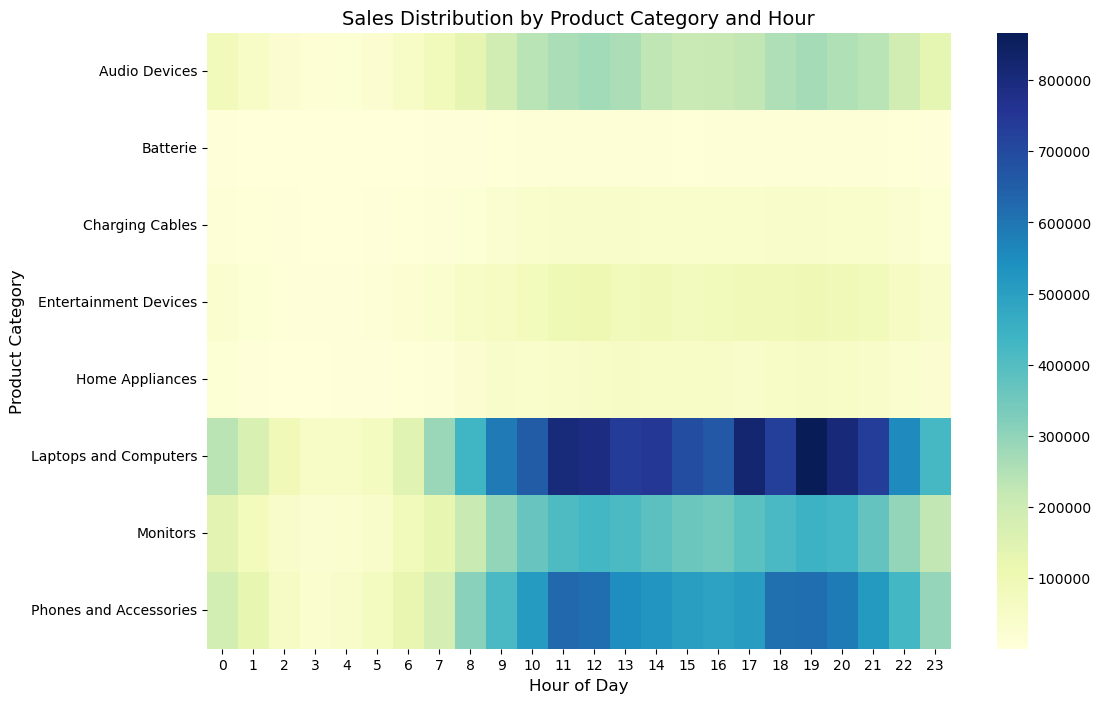

In [31]:
heatmap_data = df.pivot_table(index='Product Category', columns='Hour', values='Sales', aggfunc='sum')

heatmap_data = heatmap_data.fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title('Sales Distribution by Product Category and Hour', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.show()

  Time of Day        Sales  Percentage
0   Afternoon  12531396.39   36.331275
1     Evening  11742857.59   34.045127
2     Morning   8269243.68   23.974357
3       Night   1948538.31    5.649241 0    36.331275
1    34.045127
2    23.974357
3     5.649241
Name: Percentage, dtype: float64


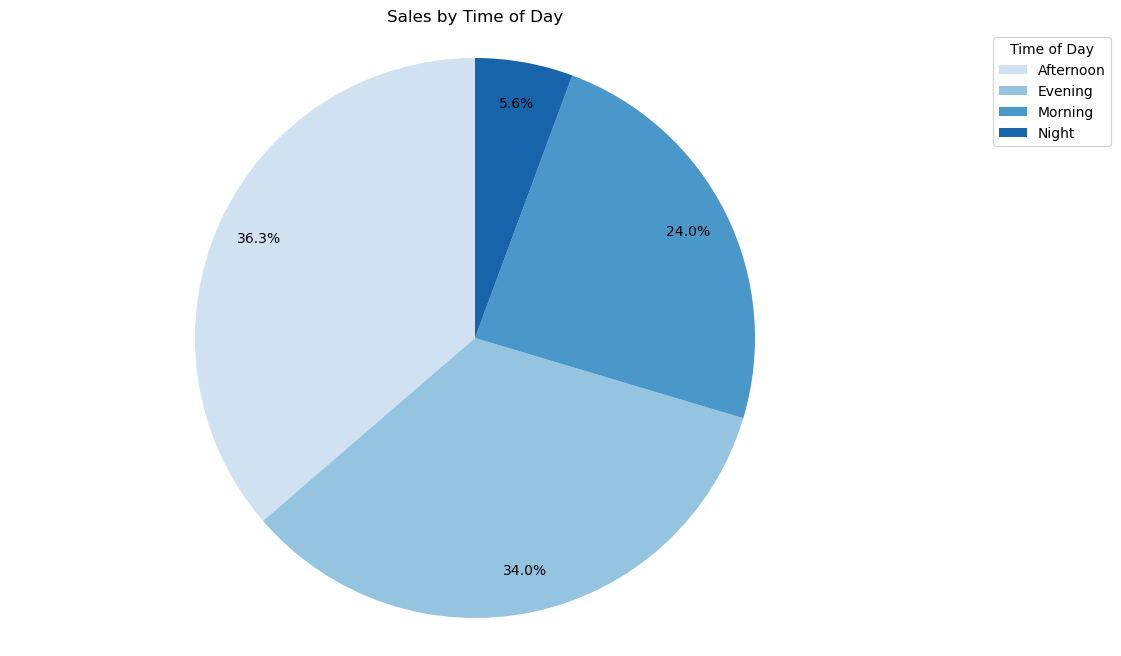

In [36]:
time_category_sales = df.groupby('Time of Day')['Sales'].sum().reset_index()
total_sales2 = time_category_sales['Sales'].sum()
time_category_sales['Percentage'] = (time_category_sales['Sales'] / total_sales2) * 100
print(time_category_sales,time_category_sales['Percentage'])

colors = sns.color_palette("Blues", len(time_category_sales))
plt.figure(figsize=(12, 8))
plt.pie(time_category_sales['Sales'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, labeldistance=1.1, colors=colors)
plt.title('Sales by Time of Day')
plt.legend(time_category_sales['Time of Day'], title='Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis('equal')  
plt.show()        

The cofficient(s) b is(are) [[6.63241127 1.0011644 ]]
The intercept a is [-6.60019477]
The linear relationship: 0.9986937223894214


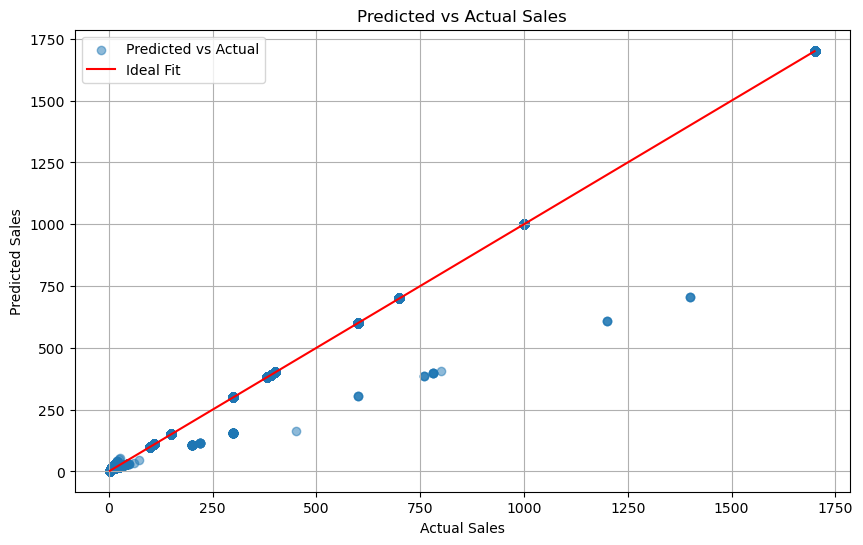

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
Z = df[['Quantity Ordered', 'Price Each']]
t = df[['Sales']]
Z_train, Z_test, t_train, t_test = train_test_split(Z, t, test_size=0.2, random_state=0)
est = LinearRegression(fit_intercept=True)
est.fit(pd.DataFrame(Z_train),pd.DataFrame(t_train))   
print("The cofficient(s) b is(are)",est.coef_)
print("The intercept a is", est.intercept_)
est.score(pd.DataFrame(Z_test),pd.DataFrame(t_test))
print("The linear relationship:",est.score(pd.DataFrame(Z_test), pd.DataFrame(t_test)))
t_pred = est.predict(pd.DataFrame(Z_test))
t_pred

plt.figure(figsize=(10, 6))
plt.scatter(t_test, t_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([t_test.min(), t_test.max()], [t_test.min(), t_test.max()], color='red', linewidth=1.5, label='Ideal Fit')
plt.title('Predicted vs Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.grid(True) #Hiện lưới, mấy cái kẻ kẻ
plt.show()

2020-01-01 05:13:00
                     Purchase Address  Recency  Frequency  Monetary
0        1 11th St, Atlanta, GA 30301      292          1     11.95
1    1 11th St, Los Angeles, CA 90001       71          1   1700.00
2  1 11th St, San Francisco, CA 94016      109          1    700.00
3    1 12th St, Los Angeles, CA 90001      287          1    150.00
4  1 12th St, New York City, NY 10001       66          1     11.99


,Purchase Address,Recency,Frequency,Monetary
0,"1 11th St, Atlanta, GA 30301",292,1,11.95
1,"1 11th St, Los Angeles, CA 90001",71,1,1700.00
2,"1 11th St, San Francisco, CA 94016",109,1,700.00
3,"1 12th St, Los Angeles, CA 90001",287,1,150.00
4,"1 12th St, New York City, NY 10001",66,1,11.99


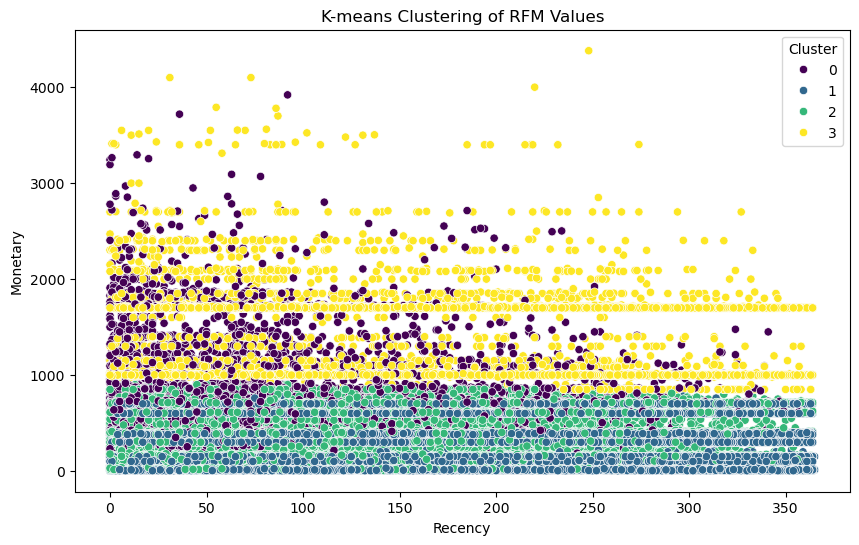

In [21]:
latest_date = df['Order Date'].max()
print(latest_date)
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df['Total'] = df['Quantity Ordered'] * df['Price Each']
# Tính các chỉ số RFM
RFM_table = df.groupby('Purchase Address').agg({
    'Order Date': lambda x: (latest_date - x.max()).days,
    'Order ID': 'count',
    'Total': 'sum'
}).reset_index()
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

RFM_table.columns = ['Purchase Address', 'Recency', 'Frequency', 'Monetary']
print(RFM_table.head())
display(RFM_table.head())
RFM_table.to_csv('RFM_Analysis.csv', index=False) 
scaler = StandardScaler()
RFM_scaled = scaler.fit_transform(RFM_table[['Recency', 'Frequency', 'Monetary']])
kmeans = KMeans(n_clusters=4, random_state=42)
RFM_table['Cluster'] = kmeans.fit_predict(RFM_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=RFM_table, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('K-means Clustering of RFM Values')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(title='Cluster')
plt.show()

In [22]:
import statsmodels.api as sm
X_train2 = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.244e+31
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:39:36   Log-Likelihood:             3.1225e+06
No. Observations:              130165   AIC:                        -6.245e+06
Df Residuals:                  130160   BIC:                        -6.245e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.171e-12   1.01e-13    -50.976      0.000   -5.37e-12   -4.97e-12
Quantity Ordered  7.999e-12   5.98e-14    133.667      0.000    7.88e-12    8.12e-12
Price Each       -3.469e-15   1.92e-15     -1.807      0.071   -7.23e-15    2.94e-16
Sales                1.0000   1.92e-15   5.22e+14      0.000       1.000       1.000
Hour              2.193e-14   4.72e-15      4.650      0.000    1.27e-14    3.12e-14
==============================================================================
Omnibus:                    62780.814   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           351553.777
Skew:                          -2.332   Prob(JB):                         0.00
Kurtosis:                       9.563   Cond. No.                     2.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""